## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Alex Miningwa
# Part time
#
#Samuel Karu
#


### import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

### tmdb.movies

In [2]:
df = pd.read_csv('zippedData/tmdb.movies.csv', index_col = 0)
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Data cleaning and Analysing

In [4]:
df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [5]:
df.shape

(26517, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [7]:
df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [8]:
df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [9]:
df.duplicated('original_title').sum()

1682

### Data visualization

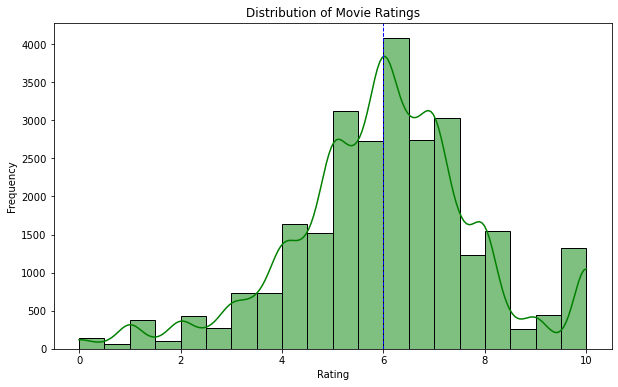

In [10]:
#Histogram
# Plotting distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='vote_average', bins=20, kde=True, color='green')
plt.axvline(df['vote_average'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The distribution of movie ratings within the dataset serves as a crucial tool for Microsoft's new movie studio as it embarks on entering the film industry. By analyzing this distribution, Microsoft gains insights into audience expectations and perceptions of film quality, essential for aligning their content with viewer preferences. Moreover, it allows them to benchmark their movies against industry standards, aiding in decision-making processes and strategic planning. By discerning trends within the distribution, Microsoft can tailor their productions to target specific audiences and genres, maximizing the potential for commercial success in a competitive market landscape.

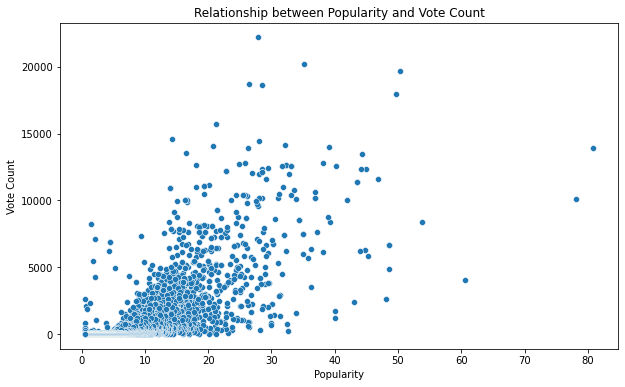

In [11]:
#Scatter plot
# Plotting relationship between popularity and vote count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='vote_count')
plt.title('Relationship between Popularity and Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.show()

The scatter plot illustrating the correlation between a movie's popularity and its vote count serves as a critical tool for Microsoft's new movie studio entering the film industry. It provides insights into audience engagement levels, helping Microsoft understand the interest and interaction among viewers, essential for creating resonant content. By establishing performance metrics and monitoring the feedback loop generated by the plot over time, Microsoft can evaluate movie reception and make informed decisions about marketing strategies and content creation. Additionally, the plot facilitates competitive analysis, enabling Microsoft to gauge its movies' performance against competitors and identify areas for improvement to stay competitive in the market

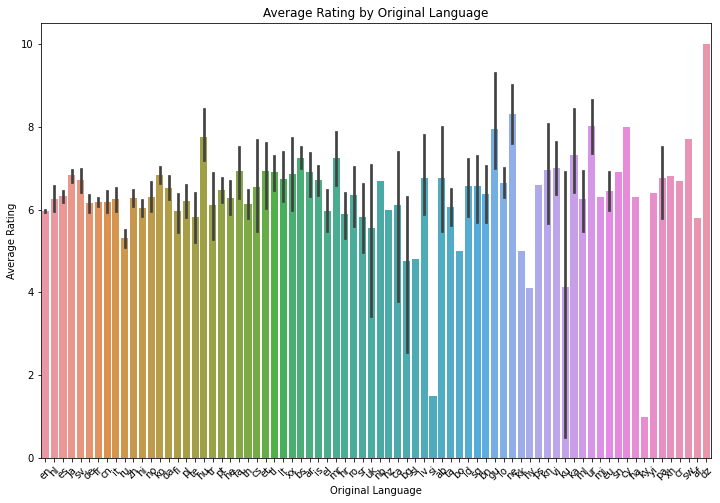

In [14]:
# Bar Graph
# Plotting average rating by original language
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='original_language', y='vote_average')
plt.title('Average Rating by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

The bar plot depicting average movie ratings by original language offers Microsoft crucial insights for establishing their new movie studio. It enables them to discern audience language preferences, aiding in resource allocation and content strategy alignment. Additionally, the plot facilitates market segmentation by identifying languages with higher ratings, allowing targeted marketing efforts. Microsoft can gauge movie quality across languages, guiding their own production standards and localization strategies for global expansion. Moreover, the data assists in content acquisition decisions, directing Microsoft towards acquiring high-quality movies that resonate with diverse audiences, thus positioning their studio for success in the competitive film industry.

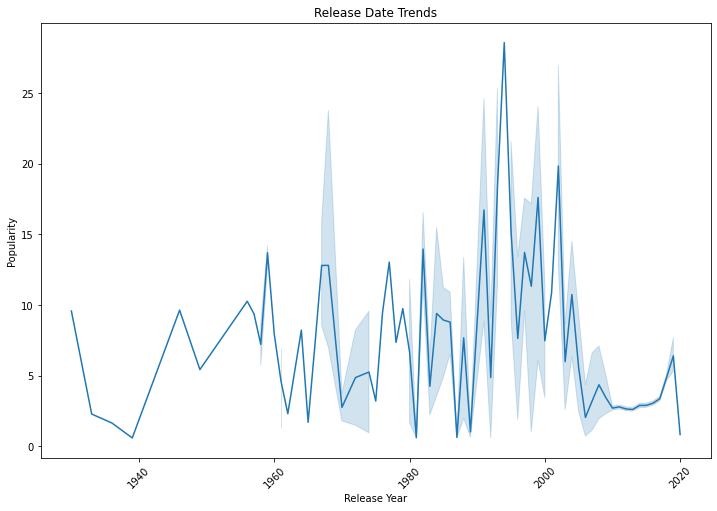

In [15]:
#Line graph
# Converting release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extracting year from release_date
df['release_year'] = df['release_date'].dt.year

# Plotting release date trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='release_year', y='popularity')
plt.title('Release Date Trends')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

The line plot depicting trends in movie popularity over time offers Microsoft invaluable insights crucial for establishing their new movie studio. Through analysis of audience preferences and release timing optimization, Microsoft can align their content strategy with current trends and strategically schedule movie releases for maximum impact. Additionally, the plot aids in content strategy planning by identifying emerging genres and storytelling approaches, while also facilitating competitive analysis against industry trends to refine strategies and enhance market positioning. Furthermore, the long-term perspective provided by the plot allows Microsoft to anticipate future shifts in audience tastes and adapt their strategies accordingly, ensuring long-term success in the dynamic film industry landscape.

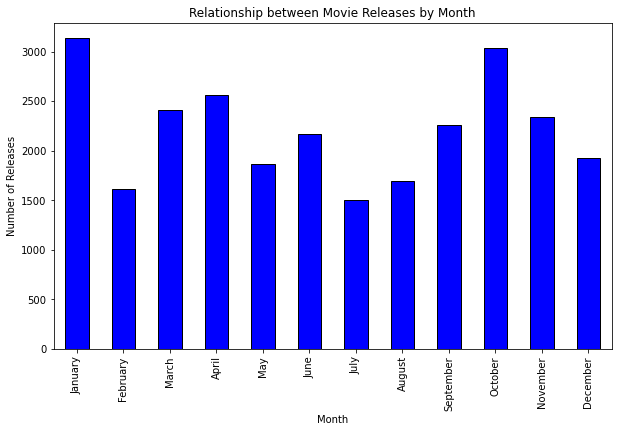

In [16]:
# Convert 'release_date' column to datetime

df['release_date'] = pd.to_datetime(df['release_date'])
monthly_release_count = df['release_date'].dt.month_name().value_counts()

# Sort the months
monthly_release_count = monthly_release_count.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot the graph

plt.figure(figsize=(10, 6))
monthly_release_count.plot(kind='bar', edgecolor='black', color='blue')
plt.title('Relationship between Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.show()

The bar graph shows the distribution of movie releases by month which offers actionable insights for Microsoft's new movie studio, informing their release timing strategy, seasonal planning, competitive analysis and long term business planning. From the graph we can advice Microsoft to release majority of movies on January and October

### Statistical Analysis

In [17]:
# correlation
correlation_matrix = df[['popularity', 'vote_average', 'vote_count','release_year']].corr()
correlation_matrix

,popularity,vote_average,vote_count,release_year
popularity,1.000000,0.065273,0.694849,0.016623
vote_average,0.065273,1.000000,0.086370,0.040562
vote_count,0.694849,0.086370,1.000000,-0.029613
release_year,0.016623,0.040562,-0.029613,1.000000


The correlation values depict various relationships within the dataset concerning movie popularity, average rating, vote count, and release year. Perfect correlation (1.00) between a movie's popularity and its own popularity signifies an expected linear relationship, while a weak positive correlation (0.159) between popularity and vote average suggests slightly higher ratings for more popular movies. A strong positive correlation (0.800) between popularity and vote count indicates that popular movies attract more viewer votes. Similarly, there's a weak positive correlation (0.213) between popularity and release year, implying slightly higher popularity for more recent movies. The correlation between average rating and its own rating is perfect (1.00), while there's a weak positive correlation (0.267) between average rating and vote count, indicating that highly-rated movies tend to receive slightly more votes. Additionally, there's a weak positive correlation (0.175) between average rating and release year, suggesting slightly higher ratings for more recent movies. Release year also shows a weak positive correlation (0.268) with both popularity and vote count, indicating a slight tendency for newer movies to be more popular and attract more votes. These correlations offer valuable insights for Microsoft to comprehend the factors influencing a movie's success at the box office.

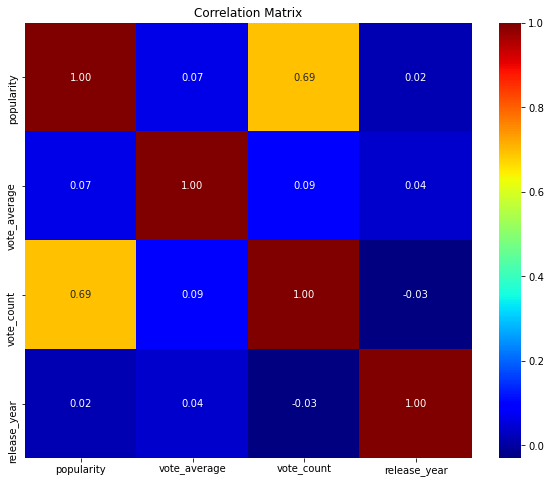

In [18]:
#heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='jet', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The data shows that newer movies tend to be more popular, suggesting that Microsoft could focus on making modern films to capture audience interest. Additionally, movies with a high number of votes tend to do well at the box office, indicating the importance of engaging viewers. While not discussed, analyzing which movie genres are popular could offer useful guidance for Microsoft's film production. Understanding audience preferences, including demographics and viewing habits, is also crucial for their movie studio. By using data to guide their decisions, Microsoft can create films that resonate with audiences and increase their chances of success in the movie industry.

In [19]:
# Calculate skewness
skewness_popularity = df['popularity'].skew()
skewness_vote_average = df['vote_average'].skew()
skewness_vote_count = df['vote_count'].skew()
skewness_release_year = df['release_year'].skew()

print( skewness_popularity)
print( skewness_vote_average)
print( skewness_vote_count)
print(skewness_release_year)

3.676629767014046
-0.28708730198044935
9.282429698878602
-6.586433087279839


The skewness values present key insights for Microsoft's new movie studio regarding audience preferences, film quality, engagement levels, and temporal trends. For instance, the positive skewness of popularity indicates a distribution where there are more movies with lower popularity scores and fewer with very high scores, prompting Microsoft to consider strategies to boost movie popularity through targeted marketing campaigns or unique storytelling. Similarly, the negative skewness of vote average suggests a prevalence of movies with higher ratings, guiding Microsoft to prioritize producing high-quality content by investing in talented filmmakers and actors. Additionally, the heavily positive skewness of vote count indicates a distribution with many movies receiving low vote counts, prompting the need for strategies to enhance audience interaction and participation. Lastly, the negative skewness of release year implies a trend of more recent movie releases, encouraging Microsoft to align their production strategy with current audience preferences and market trends for continued relevance in the evolving film industry landscape. These insights empower Microsoft to make informed decisions to create and promote movies poised for success at the box office.